Quantitative Methods for Finance
2025 Marina Dolfin

QMF2_3_Modelling_Regression

Estimating a Linear Regression Model with OLS


This activity introduces ordinary least squares (OLS) linear regression in MATLAB using a tiny, didactic house-pricing dataset. We'll keep the workflow practical.
(A short theoretical background is provided at the end of the notebook.)

Workflow (the basic one):

Load a small table of house prices and basic features
Fit a linear model with fitlm
Inspect fit quality with the built-in diagnostic plot
Make a point prediction for a new house profile using predict

Dataset
HousePrices is a table file (XLSX) with a numeric response variable Price and a couple of predictors (Size and a simple indicator feature).

This example shows the typical workflow for linear regression analysis using fitlm. The general workflow should include preparing a data set, fitting a linear regression model, evaluating and improving the fitted model, and predicting response values for new predictor data. 

In the present example we perform only the very basic steps


In [1]:



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import plot_partregress_grid
from statsmodels.stats.diagnostic import linear_reset
from pathlib import Path





1) Load the data

- Point `xlsx_path` to your spreadsheet (e.g., HousePrices.xlsx).
- The sheet should include columns like `Price` (response), `Sfeet`, and `Bedrooms` (predictors).


In [4]:


# Read the workbook (first sheet by default)
df = pd.read_excel("HousePrices.xlsx")

# Quick checks
display(df.head())
df.info()


,Sfeet,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Sfeet     47 non-null     int64
 1   Bedrooms  47 non-null     int64
 2   Price     47 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB



2) Fit an OLS linear model

We model Price as a linear function of Sfeet and Bedrooms.


In [5]:

# Formula mirrors MATLAB: Price ~ 1 + Sfeet + Bedrooms
model = smf.ols("Price ~ Sfeet + Bedrooms", data=df).fit()

# Summary with coefficients, t-stats, p-values, R-squared, etc.
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     29.85
Date:                Sat, 18 Oct 2025   Prob (F-statistic):           6.44e-09
Time:                        17:42:35   Log-Likelihood:                -597.65
No. Observations:                  47   AIC:                             1201.
Df Residuals:                      44   BIC:                             1207.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.029e+05   5.26e+04      1.957      0.0


3) Diagnostics

3a) Added-variable (partial regression) plots


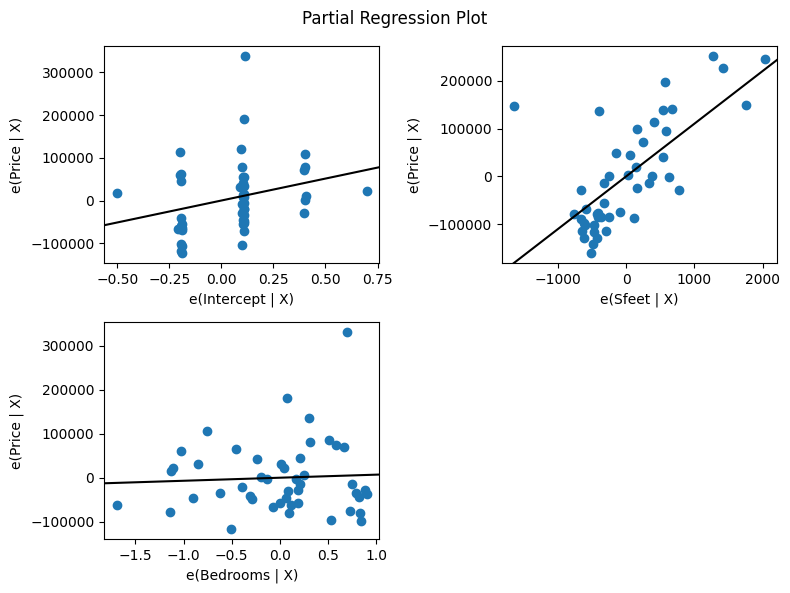

In [6]:

fig = plt.figure(figsize=(8, 6))
plot_partregress_grid(model, fig=fig)
plt.tight_layout()
plt.show()



3b) Residuals vs Fitted and QQ plot


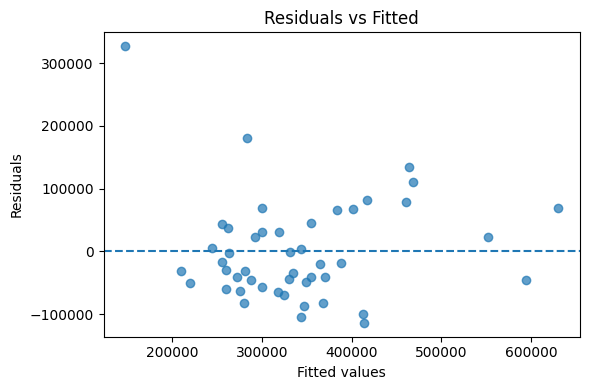

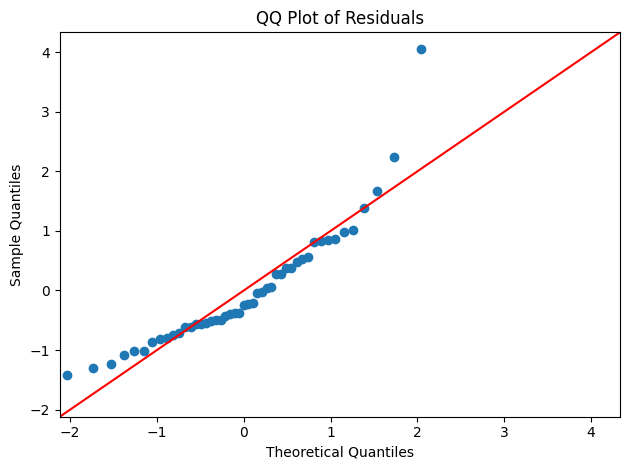

In [7]:

fitted = model.fittedvalues
resid = model.resid

# Residuals vs Fitted
plt.figure(figsize=(6, 4))
plt.scatter(fitted, resid, alpha=0.7)
plt.axhline(0, linestyle="--")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.tight_layout()
plt.show()

# QQ plot of residuals
sm.qqplot(resid, line="45", fit=True)
plt.title("QQ Plot of Residuals")
plt.tight_layout()
plt.show()



4) Predict a new observation

Pass a small DataFrame with named columns to avoid column-order mistakes.


In [8]:

# Example: a 5,000 sq ft house with 1 bedroom
new_house = pd.DataFrame({"Sfeet": [5000], "Bedrooms": [1]})
yhat = model.predict(new_house)

print(f"Estimated price: ${float(yhat.iloc[0]):.0f}")


Estimated price: $659908



5) (Optional) Add polynomial terms

"Linear regression" means linear in coefficients; you can still include polynomial terms and fit via OLS.


In [9]:

# Quadratic term for Sfeet
df = df.copy()
df["Sfeet2"] = df["Sfeet"]**2

poly_model = smf.ols("Price ~ Sfeet + Sfeet2 + Bedrooms", data=df).fit()
print(poly_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     25.19
Date:                Sat, 18 Oct 2025   Prob (F-statistic):           1.45e-09
Time:                        17:43:52   Log-Likelihood:                -593.96
No. Observations:                  47   AIC:                             1196.
Df Residuals:                      43   BIC:                             1203.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.375e+05      7e+04      3.394      0.0

In [9]:

# Quadratic term for Sfeet
df = df.copy()
df["Sfeet2"] = df["Sfeet"]**2

poly_model = smf.ols("Price ~ Sfeet + Sfeet2 + Bedrooms", data=df).fit()
print(poly_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     25.19
Date:                Sat, 18 Oct 2025   Prob (F-statistic):           1.45e-09
Time:                        17:43:52   Log-Likelihood:                -593.96
No. Observations:                  47   AIC:                             1196.
Df Residuals:                      43   BIC:                             1203.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.375e+05      7e+04      3.394      0.0

1. Standard errors assumption  
   The line  
   > “Standard Errors assume that the covariance matrix of the errors is correctly specified.”  
   means that the reported t-statistics and p-values rely on the classical OLS assumption of homoskedastic, uncorrelated errors.  
   If heteroskedasticity is suspected, we can request robust standard errors:
  
   smf.ols("Price ~ Sfeet + Bedrooms", data=df).fit(cov_type="HC1")

The large condition number  measures potential multicollinearity — i.e., strong correlation between predictors.

A very large number suggests near-linear dependence between variables (e.g., Sfeet and Sfeet² in polynomial regressions).

Multicollinearity doesn’t bias the estimates but makes them unstable and inflates standard errors.
   
 6) (Optional) Ramsey RESET test

Tests for functional-form misspecification.  
H0: baseline model is correctly specified.


In [10]:

# RESET with powers of fitted values (F-test version)
reset_res = linear_reset(model, power=2, use_f=True)
print(reset_res)  # Shows F-statistic and p-value

# Interpretation: small p-value => evidence of misspecification; large p-value => linear form is adequate.


<F test: F=6.831993590599479, p=0.012291938598162305, df_denom=43, df_num=1>
